<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>

<h1 align="center"><font size="5">Final Project: House Sales in King County, USA </font></h1>


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
    <li><a href="#Instructions">Instructions</a></li>
    <li><a href="#About-the-Dataset">About the Dataset</a></li>
    <li><a href="#Module-1:-Importing-Data-Sets">Module 1: Importing Data </a></li>
    <li><a href="#Module-2:-Data-Wrangling">Module 2: Data Wrangling</a> </li>
    <li><a href="#Module-3:-Exploratory-Data-Analysis">Module 3: Exploratory Data Analysis</a></li>
    <li><a href="#Module-4:-Model-Development">Module 4: Model Development</a></li>
    <li><a href="#Module-5:-Model-Evaluation-and-Refinement">Module 5: Model Evaluation and Refinement</a></li>
</a></li>
</div>
<p>Estimated Time Needed: <strong>75 min</strong></p>
</div>

<hr>


# Instructions


In this assignment, you are a Data Analyst working at a Real Estate Investment Trust. The Trust would like to start investing in Residential real estate. You are tasked with determining the market price of a house given a set of features. You will analyze and predict housing prices using attributes or features such as square footage, number of bedrooms, number of floors, and so on. This is a template notebook; your job is to complete the ten questions. Some hints to the questions are given.

As you are completing this notebook, take and save the **screenshots** of the final outputs of your solutions (e.g., final charts, tables, calculation results etc.). They will need to be shared in the following Peer Review section of the Final Project module.


# About the Dataset

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. It was taken from [here](https://www.kaggle.com/harlfoxem/housesalesprediction?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-wwwcourseraorg-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01). It was also slightly modified for the purposes of this course. 


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


## **Import the required libraries**


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [64]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [66]:
#!pip install -U scikit-learn

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Module 1: Importing Data Sets


Download the dataset by running the cell below.


In [72]:
import piplite
await piplite.install('seaborn')

ModuleNotFoundError: No module named 'piplite'

In [ ]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [ ]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

In [ ]:
await download(filepath, "housing.csv")
file_name="housing.csv"

Load the csv:


In [ ]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [76]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df = pd.read_csv(filepath, header=None)

We use the method <code>head</code> to display the first 5 columns of the dataframe.


In [77]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,NaN,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,0.0,7129300520,20141013T000000,221900.0,3.0,1.0,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,1.0,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.721000000000004,-122.319,1690,7639
3,2.0,5631500400,20150225T000000,180000.0,2.0,1.0,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.23299999999999,2720,8062
4,3.0,2487200875,20141209T000000,604000.0,4.0,3.0,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.39299999999999,1360,5000


### Question 1

Display the data types of each column using the function dtypes. Take a screenshot of your code and output. You will need to submit the screenshot for the final project. 


In [106]:
#Enter Your Code, Execute and take the Screenshot
df.dtypes

0     float64
1      object
2      object
3      object
4      object
5      object
6      object
7      object
8      object
9      object
10     object
11     object
12     object
13     object
14     object
15     object
16     object
17     object
18     object
19     object
20     object
21     object
dtype: object

We use the method describe to obtain a statistical summary of the dataframe.


In [82]:
df.describe()

,0
count,21613.00000
mean,10806.00000
std,6239.28002
min,0.00000
25%,5403.00000
50%,10806.00000
75%,16209.00000
max,21612.00000


# Module 2: Data Wrangling


### Question 2

Drop the columns <code>"id"</code>  and <code>"Unnamed: 0"</code> from axis 1 using the method <code>drop()</code>, then use the method <code>describe()</code> to obtain a statistical summary of the data. Make sure the <code>inplace</code> parameter is set to <code>True</code>. Take a screenshot of your code and output. You will need to submit the screenshot for the final project. 


In [114]:
headers = ["Unnamed: 0", "id", "date", "price", "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "waterfront", "view", "condition", "grade", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "zipcode", "lat", "long", "sqft_living15", "sqft_lot15"]
df.columns = headers
print(df.head(10))
	




   Unnamed: 0          id             date      price  bedrooms  bathrooms  \
0         NaN          id             date      price  bedrooms  bathrooms   
1         0.0  7129300520  20141013T000000   221900.0       3.0        1.0   
2         1.0  6414100192  20141209T000000   538000.0       3.0       2.25   
3         2.0  5631500400  20150225T000000   180000.0       2.0        1.0   
4         3.0  2487200875  20141209T000000   604000.0       4.0        3.0   
5         4.0  1954400510  20150218T000000   510000.0       3.0        2.0   
6         5.0  7237550310  20140512T000000  1225000.0       4.0        4.5   
7         6.0  1321400060  20140627T000000   257500.0       3.0       2.25   
8         7.0  2008000270  20150115T000000   291850.0       3.0        1.5   
9         8.0  2414600126  20150415T000000   229500.0       3.0        1.0   

   sqft_living  sqft_lot  floors  waterfront  ...  grade  sqft_above  \
0  sqft_living  sqft_lot  floors  waterfront  ...  grade  sqft_above 

In [120]:
df.drop(["id","Unnamed: 0"], axis=1, inplace=True)

# Generate a statistical summary of the data
df.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21614,21614,21601,21604,21614,21614,21614,21614,21614,21614,21614,21614,21614,21614,21614,21614,21614,21614,21614,21614
unique,373,4029,13,30,1039,9783,7,3,6,6,13,947,307,117,71,71,5035,753,778,8690
top,20140623T000000,450000.0,3.0,2.5,1300,5000,1.0,0,0,3,7,1300,0,2014,0,98103,47.6846,-122.29,1540,5000
freq,142,172,9824,5380,138,358,10680,21450,19489,14031,8981,212,13126,559,20699,602,17,116,197,427


We can see we have missing values for the columns <code> bedrooms</code>  and <code> bathrooms </code>


In [122]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


We can replace the missing values of the column <code>'bedrooms'</code> with the mean of the column  <code>'bedrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code>inplace</code> parameter to <code>True</code>


In [163]:
# Convert 'bathrooms' column to numeric, forcing errors to NaN
df['bedrooms'] = pd.to_numeric(df['bedrooms'], errors='coerce')

# Now you can compute the mean
mean = df['bedrooms'].mean()

# Replace NaN values with the mean
df['bedrooms'].fillna(mean, inplace=True)

# Verify the changes
print(df['bedrooms'].head())


0    3.37287
1    3.00000
2    3.00000
3    2.00000
4    4.00000
Name: bedrooms, dtype: float64


We also replace the missing values of the column <code>'bathrooms'</code> with the mean of the column  <code>'bathrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code> inplace </code>  parameter top <code> True </code>


In [161]:
# Convert 'bathrooms' column to numeric, forcing errors to NaN
df['bathrooms'] = pd.to_numeric(df['bathrooms'], errors='coerce')

# Now you can compute the mean
mean = df['bathrooms'].mean()

# Replace NaN values with the mean
df['bathrooms'].fillna(mean, inplace=True)

# Verify the changes
print(df['bathrooms'].head())


0    2.115736
1    1.000000
2    2.250000
3    1.000000
4    3.000000
Name: bathrooms, dtype: float64


In [127]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


# Module 3: Exploratory Data Analysis


### Question 3

Use the method <code>value_counts</code> to count the number of houses with unique floor values, use the method <code>.to_frame()</code> to convert it to a data frame. Take a screenshot of your code and output. You will need to submit the screenshot for the final project. 


In [185]:
# Count the number of houses with unique floor values
floor_counts = df['floors'].value_counts()

# Convert the Series to a DataFrame
floor_counts_df = floor_counts.to_frame()

# Rename the column to 'count' for clarity
floor_counts_df.columns = ['count']

# Print the DataFrame
print(floor_counts_df)


df["floors"].unique()
floor_value = df["floors"].value_counts()
floor_df=floor_value.to_frame()
floor_df.columns = ['count']
print(floor_df)

        count
floors       
1.0     10680
2.0      8241
1.5      1910
3.0       613
2.5       161
3.5         8
floors      1
        count
floors       
1.0     10680
2.0      8241
1.5      1910
3.0       613
2.5       161
3.5         8
floors      1


### Question 4

Use the function <code>boxplot</code> in the seaborn library  to  determine whether houses with a waterfront view or without a waterfront view have more price outliers. Take a screenshot of your code and boxplot. You will need to submit the screenshot for the final project. 


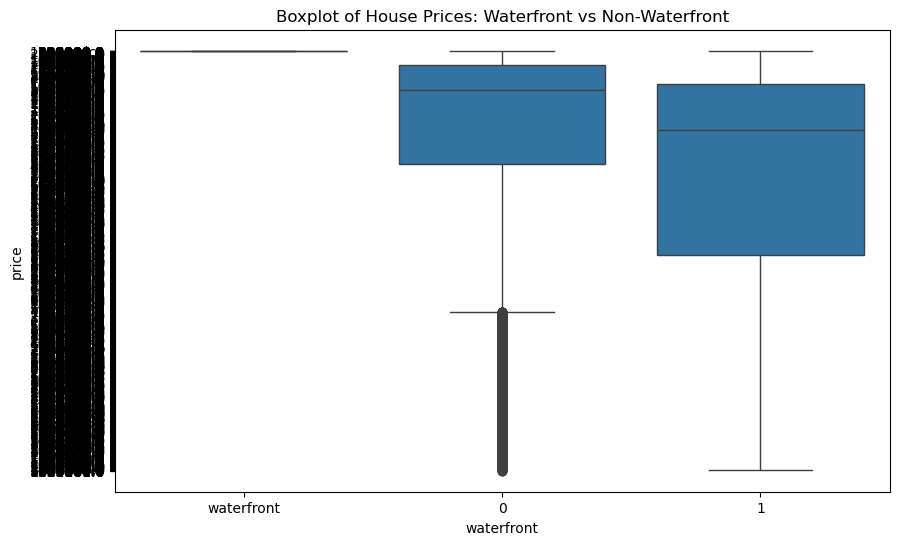

In [194]:
#sns.boxplot(x="waterfront", y="price", data=df)
# Create a boxplot to compare the price of houses with and without a waterfront view
plt.figure(figsize=(10, 6))
sns.boxplot(x='waterfront', y='price', data=df)

# Add a title to the plot
plt.title('Boxplot of House Prices: Waterfront vs Non-Waterfront')

# Show the plot
plt.show()

### Question 5

Use the function <code>regplot</code>  in the seaborn library  to  determine if the feature <code>sqft_above</code> is negatively or positively correlated with price. Take a screenshot of your code and scatterplot. You will need to submit the screenshot for the final project. 


The function `pd.to_numeric()` in Pandas is used to **convert values in a Series (or DataFrame column) into numeric data types** (e.g., integers or floats). It tries to coerce the values to numeric types and provides options to handle non-numeric values.

### Key Parameters:
1. **`arg`**: The Series or column you want to convert.
2. **`errors`**: Determines how to handle non-numeric values.
   - **`'raise'` (default)**: If any value cannot be converted to a number, it will raise an error.
   - **`'coerce'`**: Converts invalid parsing (e.g., strings or non-numeric values) to `NaN` (Not a Number).
   - **`'ignore'`**: Leaves the non-numeric values unchanged.
3. **`downcast`**: Allows downcasting of the resulting numeric values to a smaller data type, like from `float64` to `float32` or from `int64` to `int32`, to save memory.

### Example:

```python
import pandas as pd

# A sample Series with mixed data
s = pd.Series(['1', '2', 'three', '4.5', 'five'])

# Convert to numeric, setting errors='coerce' to handle invalid entries
s_numeric = pd.to_numeric(s, errors='coerce')

print(s_numeric)
```

**Output:**

```
0    1.0
1    2.0
2    NaN
3    4.5
4    NaN
dtype: float64
```

In this example:
- The strings `'three'` and `'five'` could not be converted to numbers, so they were replaced with `NaN` because of the `errors='coerce'` parameter.
  
### Summary:
- **`pd.to_numeric()`** is useful when you want to ensure a column is numeric and handle any non-numeric data by converting it to `NaN` or ignoring it.


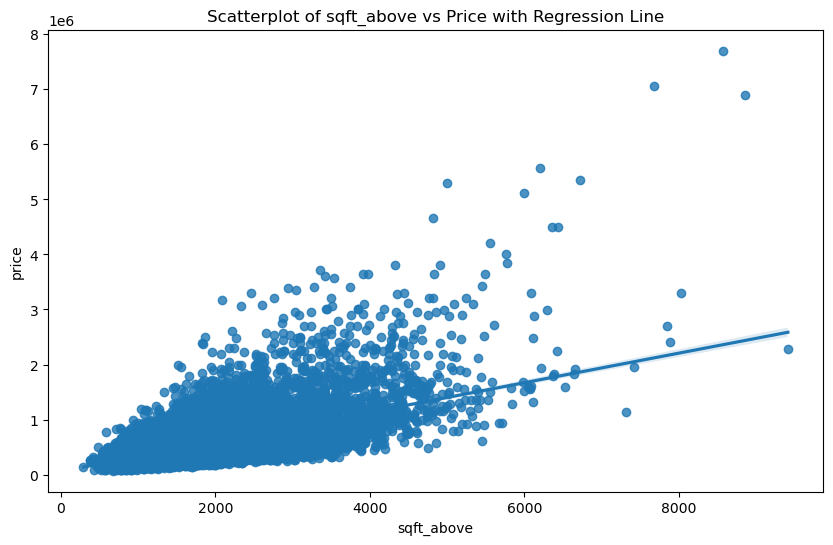

In [202]:
#Enter Your Code, Execute and take the Screenshot
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'sqft_above' and 'price' columns are numeric, convert non-numeric to NaN
df['sqft_above'] = pd.to_numeric(df['sqft_above'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Drop rows with NaN values in 'sqft_above' or 'price' (optional, depending on your needs)
df = df.dropna(subset=['sqft_above', 'price'])

# Create the scatterplot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='sqft_above', y='price', data=df)

# Add a title to the plot
plt.title('Scatterplot of sqft_above vs Price with Regression Line')

# Show the plot
plt.show()




We can use the Pandas method <code>corr()</code>  to find the feature other than price that is most correlated with price.


In [211]:
# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Extract the correlation of all features with 'price'
price_correlation = correlation_matrix['price'].drop('price')

# Find the feature with the highest correlation to price
most_correlated_feature = price_correlation.idxmax()
max_correlation_value = price_correlation.max()

print(f"The feature most correlated with price is '{most_correlated_feature}' with a correlation of {max_correlation_value}.")


The feature most correlated with price is 'sqft_above' with a correlation of 0.6055672983560784.


# Module 4: Model Development


We can Fit a linear regression model using the  longitude feature <code>'long'</code> and  caculate the R^2.


In [ ]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

### Question  6

Fit a linear regression model to predict the <code>'price'</code> using the feature <code>'sqft_living'</code> then calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.


In [213]:
#Enter Your Code, Execute and take the Screenshot
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)

print(lm.score(X, Y))

0.4928532179037931


### Question 7

Fit a linear regression model to predict the <code>'price'</code> using the list of features:


In [224]:
features =df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]   

Then calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.


In [226]:
#Enter Your Code, Execute and take the Screenshot
# Create a linear regression model
lm = LinearRegression()

# Fit the model on the feature(s) and target
lm.fit(features, Y)

# Print the R^2 score
r_squared = lm.score(features, Y)
print(f'R^2 value: {r_squared}')

R^2 value: 0.6576968031260604


### This will help with Question 8

Create a list of tuples, the first element in the tuple contains the name of the estimator:

<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple  contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>


In [228]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

### Question 8

Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list <code>features</code>, and calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.


In [240]:
#Enter Your Code, Execute and take the Screenshot
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
pipe=Pipeline(Input)
features = features.astype(float)
pipe.fit(features,Y)
ypipe=pipe.predict(features)


# Calculate and print the R^2 score
r2 = r2_score(Y, ypipe)
print(f'R^2 value: {r2}')

R^2 value: 0.7501189904838139


# Module 5: Model Evaluation and Refinement


Import the necessary modules:


In [242]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


We will split the data into training and testing sets:


In [244]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


### Question 9

Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.


In [246]:
from sklearn.linear_model import Ridge

In [248]:
#Enter Your Code, Execute and take the Screenshot
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))

0.6478759163939097


### Question 10

Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2. You will need to submit it for the final project.


In [250]:
#Enter Your Code, Execute and take the Screenshot
# x_train, x_test, y_train, y_test hold same values as in previous cells
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.7002744313610972


<p>Once you complete your notebook you will have to share it. You can download the notebook by navigating to "File" and clicking on "Download" button.
        <p><img width="600" src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%206/images/DA0101EN_FA_Image21.png" alt="share notebook" style="display: block; margin-left: auto; margin-right: auto;"></p>
        <p></p>
<p>This will save the (.ipynb) file on your computer. Once saved, you can upload this file in the "My Submission" tab, of the "Peer-graded Assignment" section.  
          


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01">Michelle Carey</a>, <a href="https://www.linkedin.com/in/jiahui-mavis-zhou-a4537814a?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01">Mavis Zhou</a>



## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
<!--## Change Log

| Date (YYYY-MM-DD) | Version | Changed By      | Change Description                           |
| ----------------- | ------- | --------------- | -------------------------------------------- |
| 2020-12-01        | 2.2     | Aije Egwaikhide | Coverted Data describtion from text to table |
| 2020-10-06        | 2.1     | Lakshmi Holla   | Changed markdown instruction of Question1    |
| 2020-08-27        | 2.0     | Malika Singla   | Added lab to GitLab                          |
| 2022-06-13        | 2.3     | Svitlana Kramar | Updated Notebook sharing instructions        |
| <hr>              |         |                 |                                              |


--!>
<p>
